BASELINE

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Générateurs d'images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "images/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    "images/valid",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

num_classes = train_generator.num_classes

Found 18180 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.


In [3]:
# Fonction de construction du modèle de transfer learning :
def build_transfer_model(base_model, num_classes, lr=1e-4, dropout=0.5):
    # On gèle les couches du modèle de base
    for layer in base_model.layers:
        layer.trainable = False

    # On ajoute notre tête de classification personnalisée
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout)(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# MobileNetV2
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
model_mobilenet = build_transfer_model(mobilenet_base, num_classes)

history_mobilenet = model_mobilenet.fit(train_generator, validation_data=valid_generator, epochs=10, verbose=1)

c:\Mes documents\OpenClassRooms\Projet7\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 420s 731ms/step - accuracy: 0.0510 - loss: 4.6398 - val_accuracy: 0.2446 - val_loss: 3.7094
Epoch 2/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 139s 245ms/step - accuracy: 0.2025 - loss: 3.5052 - val_accuracy: 0.4433 - val_loss: 2.3160
Epoch 3/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 138s 242ms/step - accuracy: 0.3124 - loss: 2.7933 - val_accuracy: 0.5217 - val_loss: 1.8276
Epoch 4/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 156s 274ms/step - accuracy: 0.3682 - loss: 2.4878 - val_accuracy: 0.5650 - val_loss: 1.6319
Epoch 5/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 149s 261ms/step - accuracy: 0.3943 - loss: 2.3411 - val_accuracy: 0.5871 - val_loss: 1.5074
Epoch 6/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 151s 265ms/step - accuracy: 0.4222 - loss: 2.2157 - val_accuracy: 0.6087 - val_loss: 1.4317
Epoch 7/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 151s 266ms/step - accuracy: 0.4356 - loss: 2.1341 - val_accuracy: 0.6033 - val_loss: 1.4022
Epoch 8/10
569/569 ━━━━━━━━━━━━━━━━━━━━ 142s 249ms/step - accuracy: 0.4494 -

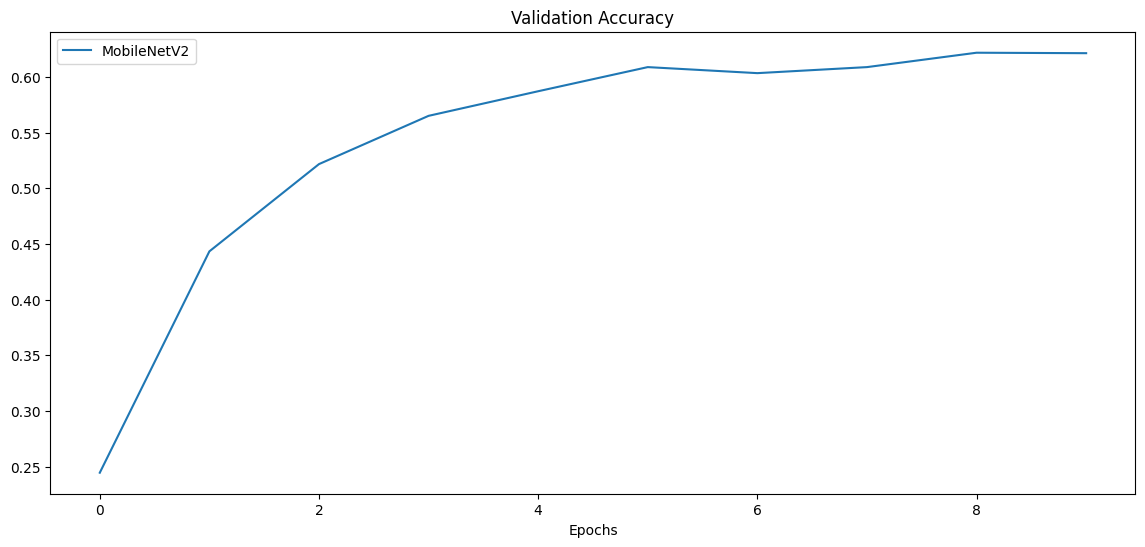

In [5]:
plt.figure(figsize=(14,6))
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV2')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [6]:
print("=== Résumé des performances ===")
print(f"MobileNetV2 - meilleure val_acc : {max(history_mobilenet.history['val_accuracy']):.3f}")

=== Résumé des performances ===
MobileNetV2 - meilleure val_acc : 0.622


Epoch 1/30
569/569 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.0102 - loss: 5.2234
Epoch 1: val_accuracy improved from None to 0.04542, saving model to best_mobilenetv2_finetuned.keras
569/569 ━━━━━━━━━━━━━━━━━━━━ 162s 276ms/step - accuracy: 0.0139 - loss: 5.0682 - val_accuracy: 0.0454 - val_loss: 4.5952
Epoch 2/30
569/569 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.0279 - loss: 4.7498
Epoch 2: val_accuracy improved from 0.04542 to 0.12500, saving model to best_mobilenetv2_finetuned.keras
569/569 ━━━━━━━━━━━━━━━━━━━━ 174s 305ms/step - accuracy: 0.0343 - loss: 4.6833 - val_accuracy: 0.1250 - val_loss: 4.2757
Epoch 3/30
569/569 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.0586 - loss: 4.4855
Epoch 3: val_accuracy improved from 0.12500 to 0.20750, saving model to best_mobilenetv2_finetuned.keras
569/569 ━━━━━━━━━━━━━━━━━━━━ 164s 288ms/step - accuracy: 0.0683 - loss: 4.4252 - val_accuracy: 0.2075 - val_loss: 3.9101
Epoch 4/30
569/569 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accur

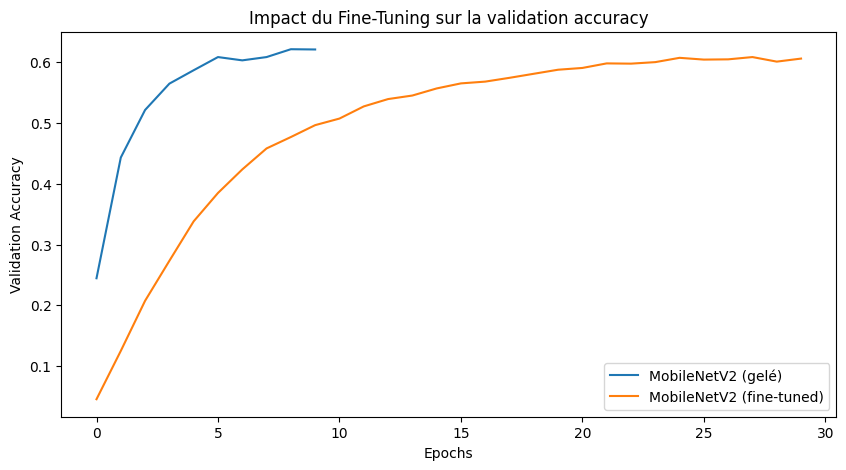

In [7]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Chargement du modèle de base MobileNetV2 sans le top
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)

# On dégèle les 20 dernières couches pour le fine-tuning
for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Création du modèle complet
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(train_generator.num_classes, activation='softmax')(x)

model_finetuned = models.Model(inputs=base_model.input, outputs=output)

# --- Compilation avec un très faible learning rate ---
model_finetuned.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Définition des callbacks ---
checkpoint_cb = ModelCheckpoint(
    filepath="best_mobilenetv2_finetuned.keras",
    monitor="val_accuracy",                       # métrique surveillée
    save_best_only=True,                          # sauvegarde seulement le meilleur modèle
    mode="max",
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# --- Entraînement du modèle avec callbacks ---
history_finetuned = model_finetuned.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

# Comparaison graphique
plt.figure(figsize=(10,5))
plt.plot(history_mobilenet.history['val_accuracy'], label="MobileNetV2 (gelé)")
plt.plot(history_finetuned.history['val_accuracy'], label="MobileNetV2 (fine-tuned)")
plt.title("Impact du Fine-Tuning sur la validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [8]:
best_val_acc = max(history_finetuned.history["val_accuracy"])
print(f"Meilleure val_accuracy atteinte : {best_val_acc:.4f}")

Meilleure val_accuracy atteinte : 0.6087


NOUVEAU MODELE - DINOv2

In [2]:
# --- IMPORTS ---
import torch
import torchvision.transforms as T
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

# Charger DINOv2 ViT-B (768 dims)
dinov2 = torch.hub.load(
    'facebookresearch/dinov2', 
    'dinov2_vitb14'
)
dinov2.eval()

# Transformation officielle DINOv2
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])

# Fonction qui extrait un embedding pour une image
def get_embedding(path):
    img = Image.open(path).convert("RGB")
    img_t = transform(img).unsqueeze(0)
    with torch.no_grad():
        emb = dinov2(img_t).cpu().numpy()
    return emb.flatten()

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to C:\Users\maely/.cache\torch\hub\main.zip


C:\Users\maely/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
C:\Users\maely/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
C:\Users\maely/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitb14/dinov2_vitb14_pretrain.pth" to C:\Users\maely/.cache\torch\hub\checkpoints\dinov2_vitb14_pretrain.pth


100%|██████████| 330M/330M [00:02<00:00, 164MB/s]  


In [3]:
def extract_dataset_embeddings(folder):
    X, y = [], []
    class_names = sorted(os.listdir(folder))
    class_to_idx = {cls: i for i, cls in enumerate(class_names)}

    for cls in class_names:
        cls_folder = os.path.join(folder, cls)
        for img_name in tqdm(os.listdir(cls_folder), desc=f"Classe {cls}"):
            img_path = os.path.join(cls_folder, img_name)
            emb = get_embedding(img_path)

            X.append(emb)
            y.append(class_to_idx[cls])

    return np.array(X), np.array(y), class_names


# --- Extraction ---
X_train, y_train, class_names = extract_dataset_embeddings("images/train")
X_valid, y_valid, _ = extract_dataset_embeddings("images/valid")

num_classes = len(class_names)

# Sauvegarde ---
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_valid.npy", X_valid)
np.save("y_valid.npy", y_valid)
np.save("class_names.npy", np.array(class_names))

print("Extraction terminée !")

Classe n02116738-African_hunting_dog: 100%|██████████| 20/20 [00:05<00:00,  3.88it/s]

Extraction terminée !


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Charger les embeddings
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_valid = np.load("X_valid.npy")
y_valid = np.load("y_valid.npy")
class_names = np.load("class_names.npy")

# One-hot encoding
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_valid_oh = tf.keras.utils.to_categorical(y_valid, num_classes=len(class_names))

# Dimensions d'entrée (768 pour DINOv2 ViT-B)
input_dim = X_train.shape[1]

# --- HEAD DE CLASSIFICATION ---
model_dino = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(len(class_names), activation='softmax')
])

model_dino.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
checkpoint_cb = ModelCheckpoint(
    filepath="best_dinov2_classifier.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Entraînement
history_dino = model_dino.fit(
    X_train, y_train_oh,
    validation_data=(X_valid, y_valid_oh),
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

c:\Users\maely\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\maely\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\maely\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

Epoch 1/30
564/569 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3813 - loss: 3.0069
Epoch 1: val_accuracy improved from None to 0.83667, saving model to best_dinov2_classifier.keras
569/569 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5924 - loss: 1.7105 - val_accuracy: 0.8367 - val_loss: 0.5306
Epoch 2/30
568/569 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8093 - loss: 0.6210
Epoch 2: val_accuracy improved from 0.83667 to 0.85958, saving model to best_dinov2_classifier.keras
569/569 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8185 - loss: 0.5964 - val_accuracy: 0.8596 - val_loss: 0.4405
Epoch 3/30
568/569 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8579 - loss: 0.4516
Epoch 3: val_accuracy improved from 0.85958 to 0.86917, saving model to best_dinov2_classifier.keras
569/569 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8633 - loss: 0.4397 - val_accuracy: 0.8692 - val_loss: 0.4193
Epoch 4/30
566/569 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8900 - loss: 0.3488
Epoch

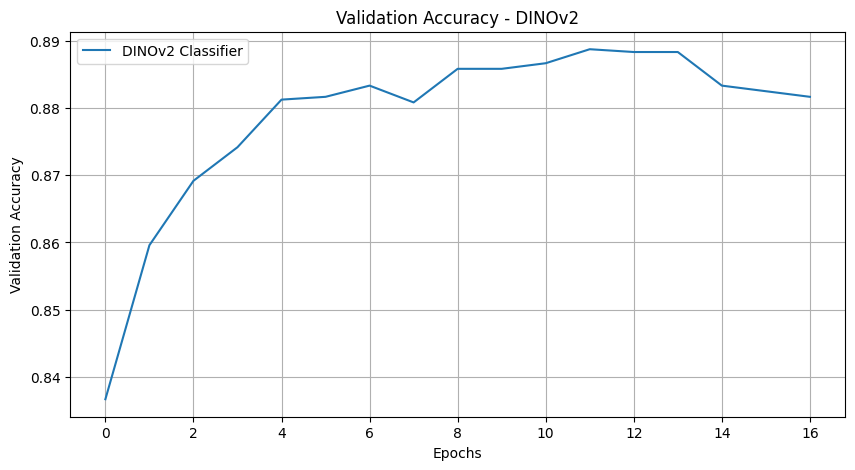

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history_dino.history['val_accuracy'], label="DINOv2 Classifier")
plt.title("Validation Accuracy - DINOv2")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("val_accuracy_dino.png")
plt.show()

COMPARAISON

In [14]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report, top_k_accuracy_score
import time
import seaborn as sns

# --- Chargement des modèles ---
mobilenet_model = load_model("best_mobilenetv2_finetuned.keras")
dino_model = load_model("best_dinov2_classifier.keras")

# --- Générateur de validation (pour MobileNetV2) ---
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    "images/valid",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2400 images belonging to 120 classes.


In [15]:
val_loss_mobilenet, val_acc_mobilenet = mobilenet_model.evaluate(valid_generator, verbose=1)
print("MobileNetV2 Fine-Tuned - Validation Accuracy:", val_acc_mobilenet)

c:\Users\maely\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.6087 - loss: 1.3806
MobileNetV2 Fine-Tuned - Validation Accuracy: 0.6087499856948853


In [16]:
# Charger les embeddings déjà calculés
X_valid = np.load("X_valid.npy")
y_valid = np.load("y_valid.npy")
y_valid_oh = np.eye(dino_model.output_shape[1])[y_valid]  # one-hot

val_loss_dino, val_acc_dino = dino_model.evaluate(X_valid, y_valid_oh, verbose=1)
print("DINOv2 Classifier - Validation Accuracy:", val_acc_dino)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8888 - loss: 0.4030
DINOv2 Classifier - Validation Accuracy: 0.8887500166893005


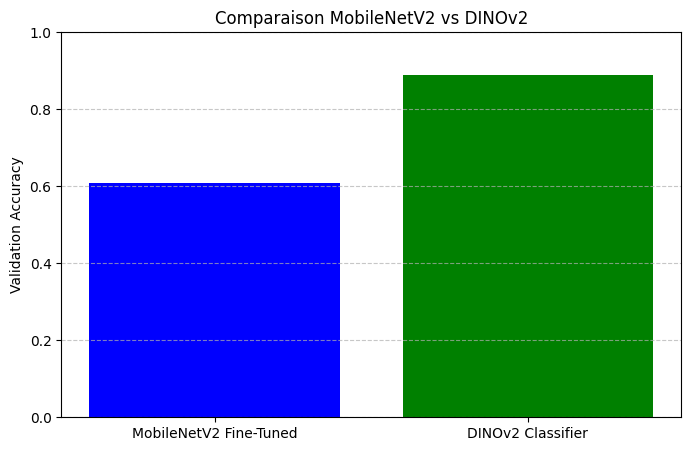

In [17]:
models = ["MobileNetV2 Fine-Tuned", "DINOv2 Classifier"]
accuracies = [val_acc_mobilenet, val_acc_dino]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=["blue", "green"])
plt.ylabel("Validation Accuracy")
plt.ylim(0,1)
plt.title("Comparaison MobileNetV2 vs DINOv2")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()